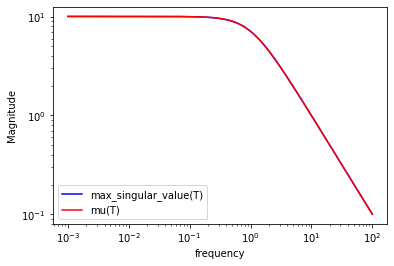

In [6]:
import numpy as np
import matplotlib.pyplot as plt

import utils


a = 10
I = np.asmatrix(np.identity(2))


def G(s):
    """process transfer matrix"""
    return 1 / ((s ** 2) + a ** 2) * np.matrix([[s - a ** 2, a * (s + 1)],
                                                [-a * (s + 1), s - a ** 2]])


def K():
    """controller"""
    return I


def T(s):
    """this is a special case where T_I(s)= T(s) """
    return G(s) * K() * (I + G(s) * K()).I

frequency = np.logspace(-3, 2, 1000)
s = 1j * frequency

max_singular_value_of_T = [max(utils.sigmas(T(si))) for si in s]
mu_T = [max(np.abs(np.linalg.eigvals(T(si)))) for si in s]

plt.loglog(frequency, max_singular_value_of_T, 'b', label='max_singular_value(T)')
plt.loglog(frequency, mu_T, 'r', label='mu(T)')
plt.legend(shadow=False)
plt.xlabel('frequency')
plt.ylabel('Magnitude')
plt.show()
